# Iris Clustering Analysis

## 1. Load the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sbn

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
display(data)

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
df = pd.DataFrame(data.data)
df.columns = data.feature_names
df['label'] = data.target
df['label'] = df['label'].map({i :  data.target_names[i] for i in data.target})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


The dataset contains 4 numerics features and one label with {'setosa', 'versicolor', 'virginica'}

## 2. Generate a synthetic dataset

We have 4 features, sepal length (cm)	and sepal width (cm) are bind, also for petal length (cm) and petal width (cm).

So we can reduce the dimension to 2, by multiplying them together in two new variables X and Y or by addition.

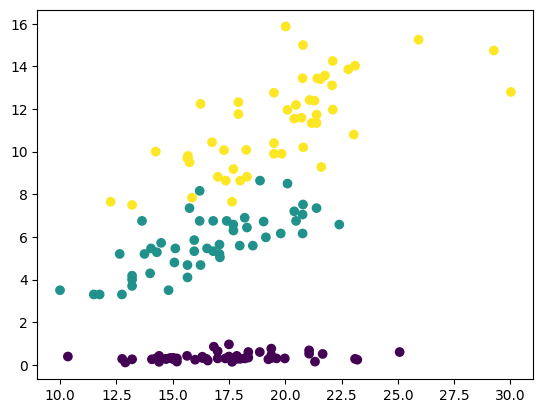

In [ ]:
plt.scatter(df['sepal length (cm)']*df['sepal width (cm)'], df['petal length (cm)']*df['petal width (cm)'], c=np.array(data.target))
plt.show()

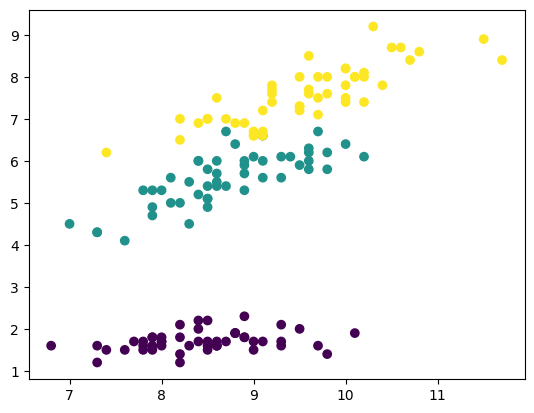

In [ ]:
plt.scatter(df['sepal length (cm)']+df['sepal width (cm)'], df['petal length (cm)']+df['petal width (cm)'], c=np.array(data.target))
plt.show()

The best clustering distribution looks to be with addition, there is a bteer distinction between versicolor and virginica than with multiplication

In [ ]:
df['X'] = df['sepal length (cm)']+df['sepal width (cm)']
df['Y'] = df['petal length (cm)']+df['petal width (cm)']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,X,Y
0,5.1,3.5,1.4,0.2,setosa,8.6,1.6
1,4.9,3.0,1.4,0.2,setosa,7.9,1.6
2,4.7,3.2,1.3,0.2,setosa,7.9,1.5
3,4.6,3.1,1.5,0.2,setosa,7.7,1.7
4,5.0,3.6,1.4,0.2,setosa,8.6,1.6


Now we can create values array and labels array with numericals values :

{'setosa' : 0, 'versicolor' : 1, 'virginica' : 2}

In [ ]:
vals = np.array(df[['X','Y']].values.tolist())
labels = np.array(data.target)

In [ ]:
def plot_cluster(values, labels, labels_names):
    """ generate plot of clusters from values and labels,
    add also a legend with corresponding labels names
    """
    unique_labels = np.unique(labels)
    d = {i : labels_names [i] for i in labels}
    for label in unique_labels:
        cluster_points = values[labels == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=d[label])

    plt.legend()
    plt.show()

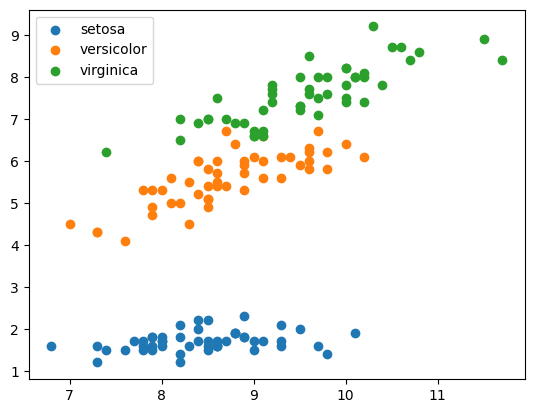

In [ ]:
#Plot the reals clusters
plot_cluster(vals, labels, data.target_names)

# Rand Index

In [ ]:
def rand_index(ref, est):
    """ return rand_index of est labels from the reals ones ref labels"""
    num = 0
    if len(ref) != len(est):
        print('arrays must be of the same size')
        error()
    for k in range(len(ref)):
        for l in range(len(ref)-k-1):
            if (ref[k]==ref[k+l+1] and est[k]==est[k+l+1]) or (ref[k]!=ref[k+l+1] and est[k]!=est[k+l+1]):
                num += 1
    den = len(ref)*(len(ref)-1)/2
    return num/den

In [ ]:
#first test for the true labels
ri = rand_index(labels, labels)
print(ri)

1.0


In [ ]:
def analysis_rand_index(n_sample, method, values, labels, k, link=None, eps=None):
  """ generate n_sample clusters for method of clustering input for values and labels,
  catch each rand index and display the distribution, the mean and max value.
  link is if you use linkage method
  eps is if you use dbscan method
  """
  print('Analysis of {} uses of {} method with {}-cluster'.format(n_sample, method.__name__, k))
  ri = np.zeros((n_sample))
  for i in range(n_sample):
    if link:
      ri[i] = rand_index(labels, method(values, k, link))
    elif eps:
      ri[i] = rand_index(labels, method(values, k, eps))
    else:
      ri[i] = rand_index(labels, method(values, k))
  print('Mean of rank index :', ri.mean())
  print('Max of rand index :', ri.max())
  print('Distribution :')
  plt.bar(0, np.mean(ri), yerr = np.std(ri), alpha=0.5, ecolor='black', capsize=10)
  plt.show()

# Random Clustering

In [ ]:
def random_cluster(vals, k):
   return np.random.randint(0, k, vals.shape[0])

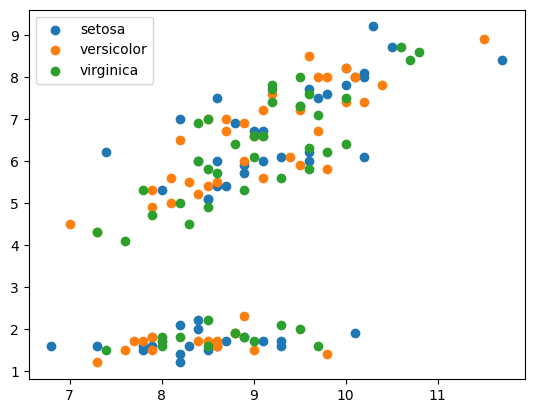

In [ ]:
random_labels = random_cluster(vals,3)
plot_cluster(vals, random_labels, data.target_names)

Analysis of 100 uses of random_cluster method with 3-cluster
Mean of rank index : 0.5567051454138703
Max of rand index : 0.5793288590604027
Distribution :


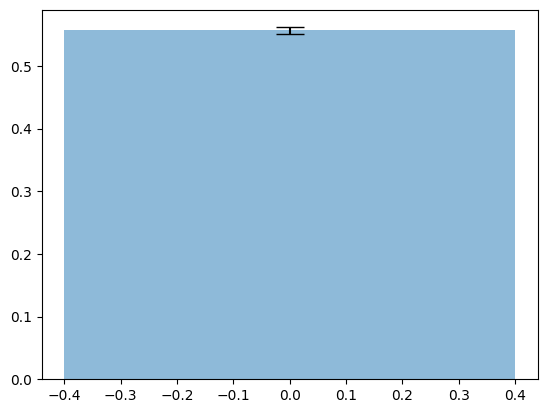

In [ ]:
analysis_rand_index(100, random_cluster,vals, labels, 3)

For our future clustering method we need to get a rand index greater than 0.55, if it will not be the case our clustering method will no be pertinent.

# Hierarchical Clustering

## Eucledian distance matrix

In [ ]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform

In [ ]:
euc_distance_matrix = pdist(vals)

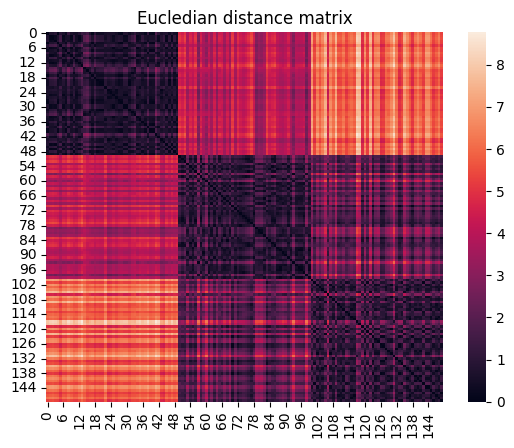

In [ ]:
#We compute the squareform with scipy.spatial.distance.squareform
#and plot a heatmap through seaborn
squareform = squareform(euc_distance_matrix)
plt.title("Eucledian distance matrix")
sbn.heatmap(squareform)
plt.show()

## Dendrogram

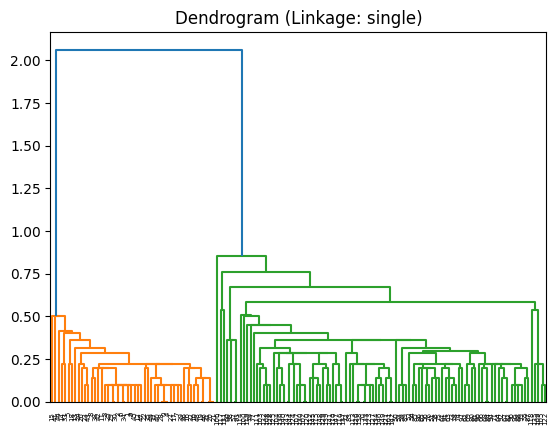

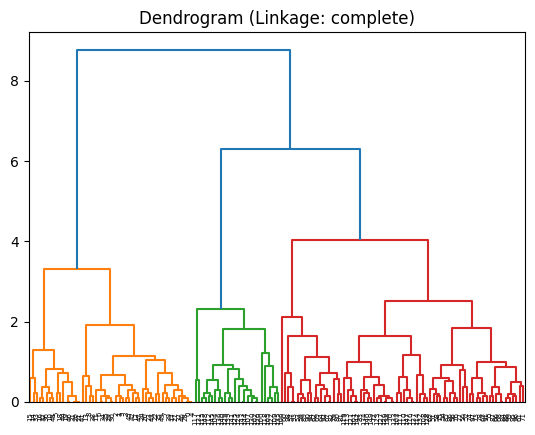

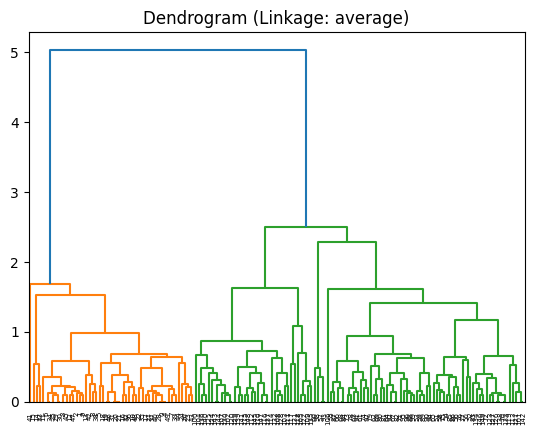

In [ ]:
def plot_dendrogram(Z, title):
  plt.figure()
  dn = dendrogram(Z)
  plt.title(title)
  plt.show()

linkages = ["single", "complete", "average"]
for link in linkages:
    Z = linkage(euc_distance_matrix, method=link)
    plot_dendrogram(Z, title=f'Dendrogram (Linkage: {link})')

- Single method is not equilibrate. Average method looks to create a good balance between clusters, we will use this method.

## Agglomerative Clustering

In [ ]:
def agglomerative_cluster(x, k, method="single"):
  d = pdist(x)
  l = linkage(d, method)
  cluster = fcluster(l, k, criterion='maxclust')
  #substrat one to agg_labels because label are equal to current label + 1
  return cluster - 1

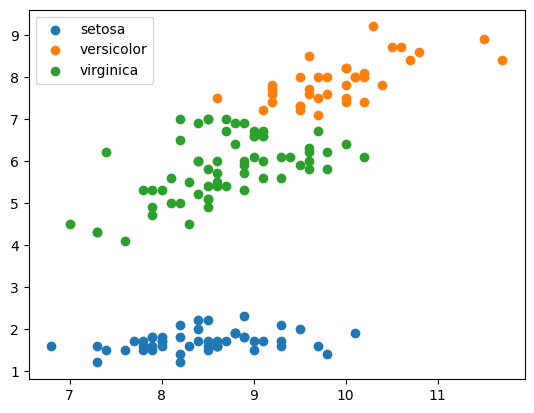

In [ ]:
agg_labels = agglomerative_cluster(vals, 3, "average")
plot_cluster(vals, agg_labels, data.target_names)

Analysis of 100 uses of agglomerative_cluster method with 3-cluster
Mean of rank index : 0.8922595078299778
Max of rand index : 0.8922595078299776
Distribution :


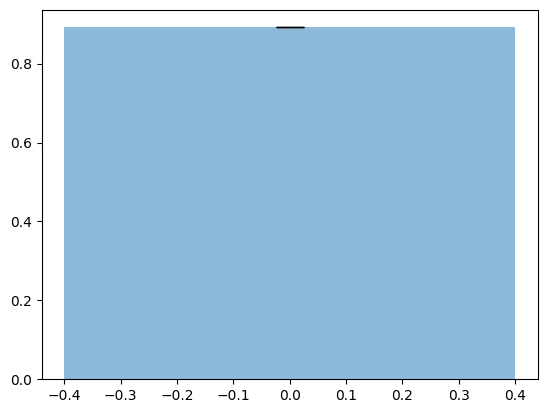

In [ ]:
analysis_rand_index(100, agglomerative_cluster,vals, labels, 3, "average")

We can see that agglomerative clustering is stable at rand index =  0.89 which is much better than random clustering.

# Partitional Clustering

In [ ]:
!pip install scikit-learn-extra

In [ ]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

 ## KMeans

In [ ]:
def kmeans_cluster(vals, k):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(vals)
    return kmeans.labels_

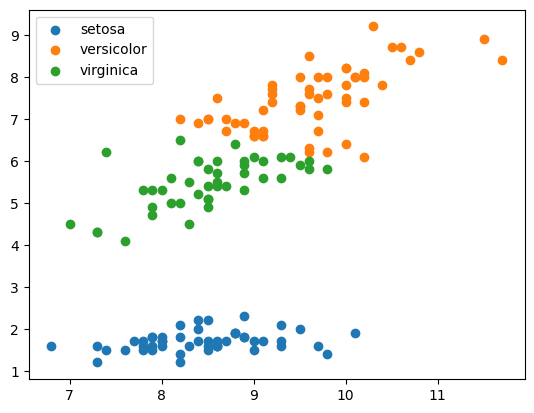

In [ ]:
kmeans_labels = kmeans_cluster(vals, 3)
plot_cluster(vals, kmeans_labels, data.target_names)

Analysis of 100 uses of kmeans_cluster method with 3-cluster
Mean of rank index : 0.919463087248322
Max of rand index : 0.9194630872483222
Distribution :


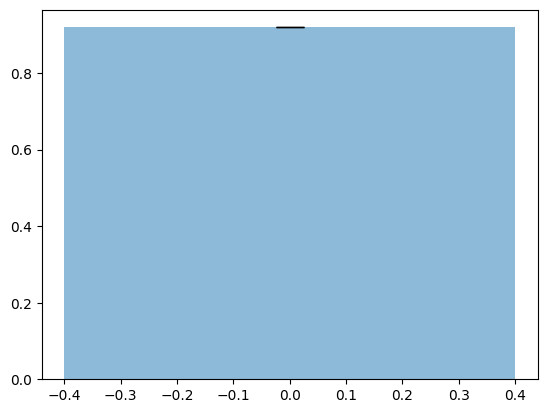

In [ ]:
analysis_rand_index(100, kmeans_cluster,vals, labels, 3)

We can see that kmeans clustering is stable at rand index =  0.92 which is much better than random clustering.

## KMedoids

In [ ]:
def kmedoids_cluster(vals, k):
    kmedoids = KMedoids(n_clusters=k, random_state=0).fit(vals)
    return kmedoids.labels_

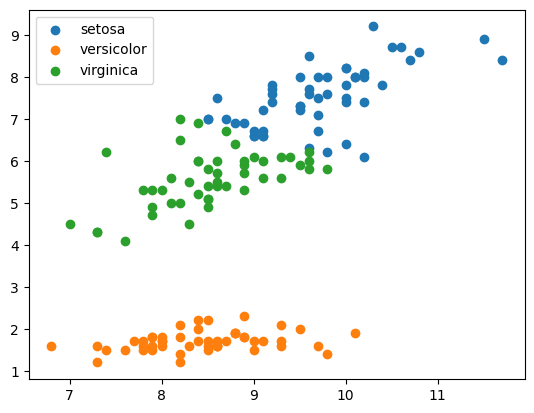

In [ ]:
kmedoids_labels = kmedoids_cluster(vals, 3)
plot_cluster(vals, kmedoids_labels, data.target_names)

Analysis of 100 uses of kmedoids_cluster method with 3-cluster
Mean of rank index : 0.919463087248322
Max of rand index : 0.9194630872483222
Distribution :


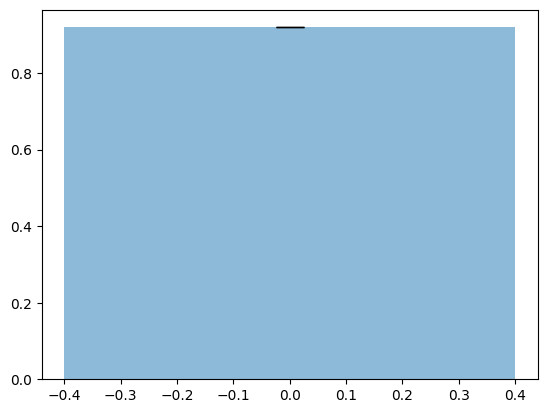

In [ ]:
analysis_rand_index(100, kmedoids_cluster,vals, labels, 3)

We can see that kmedoids clustering is stable at rand index = 0.92 which is much better than random clustering.  

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
def DBSCAN_cluster(vals, k, eps=0.5):
  clustering_DBSCAN = DBSCAN(eps=eps, min_samples=k).fit(vals)
  return clustering_DBSCAN.labels_

In [ ]:
DBSCAN_labels = DBSCAN_cluster(vals,3)
DBSCAN_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  2,  1, -1,  1,
        1,  1,  1,  3, -1,  1,  1,  3,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  3,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  3,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
print('DBSCAN clustering generate {} clusters'.format(len(np.unique(DBSCAN_labels))))

DBSCAN clustering generate 5 clusters


DBSCAN clustering didn't manage to create 3 clusters, we will try to find an eps value where we get 3 clusters.

In [ ]:
def DBSCAN_cluster_size(vals, k):
  """ try different clustering with dbscan and with different eps values
  and return all eps values which allow to create k cluster
  """
  eps_array = np.arange(0.1, 1, 0.005)
  eps_works = []
  for eps in eps_array:
    DBSCAN_labels = DBSCAN_cluster(vals,k, eps)
    if len(np.unique(DBSCAN_labels)) == k:
      eps_works.append(eps)
  return eps_works

In [ ]:
eps_works = DBSCAN_cluster_size(vals, 3)
if eps_works:
  print('there are at least {} eps values which works'.format(len(eps_works)))
else:
  print('DBSCAN clustering did not manage to create {} clusters'.format(lk))

there are at least 36 eps values which works


Now we try to catch the best eps value, if they exist

In [ ]:
if eps_works:
  ri = np.zeros((len(eps_works)))
  for i, eps in enumerate(eps_works):
    ri[i] = rand_index(labels, DBSCAN_cluster(vals,3, eps))
  print('Mean of rank index :', ri.mean())
  print('Max of rand index :', ri.max())
  index = np.where(ri == ri.max())[0][0]
  best_eps = eps_works[index]
  print('Best eps value :', best_eps)
else:
  best_eps = 0.5

Mean of rank index : 0.7767337807606265
Max of rand index : 0.7770917225950783
Best eps value : 0.6750000000000005


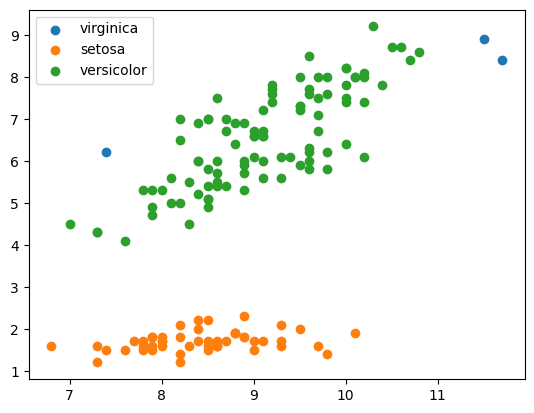

In [ ]:
if eps_works:
  DBSCAN_labels = DBSCAN_cluster(vals,3,best_eps)
  plot_cluster(vals, DBSCAN_labels, data.target_names)

Analysis of 100 uses of DBSCAN_cluster method with 3-cluster
Mean of rank index : 0.7770917225950781
Max of rand index : 0.7770917225950783
Distribution :


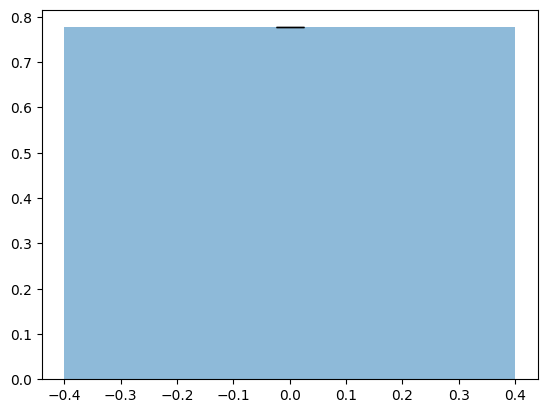

In [ ]:
if eps_works:
  analysis_rand_index(100, DBSCAN_cluster,vals, labels, 3, eps=best_eps)
else:
  analysis_rand_index(100, DBSCAN_cluster,vals, labels, 3)

We can see that DBSCAN clustering is stable at rand index = 0.78 which is much better than random clustering.

# Performance Analysis

In [ ]:
def performance_analysis(n_sample,values, labels, k,method='single', eps=0.5):
  ri = np.zeros((5, n_sample))
  for i in range(n_sample):
      ri[0, i] = rand_index(labels, random_cluster(values, k))
      ri[1, i] = rand_index(labels, agglomerative_cluster(values, k, method))
      ri[2, i] = rand_index(labels, kmeans_cluster(values, k))
      ri[3, i] = rand_index(labels, kmedoids_cluster(values, k))
      ri[4, i] = rand_index(labels, DBSCAN_cluster(values,k,eps))

  x = [0, 1, 2, 3, 4]
  method_labels = ['Random', 'Hierarchical', 'kmeans', 'kmedoids', 'DBSCAN']
  plt.bar(x, np.mean(ri, axis=1), yerr = np.std(ri, axis=1), alpha=0.5, ecolor='black')
  plt.ylabel('rand index')
  plt.xticks(x, method_labels)

  mean = ri.mean()
  max = ri.max()
  max_method_index = np.unique(np.where(ri == max)[0])
  best_methods = ''
  for k, i in enumerate(max_method_index):
     best_methods += str(k+1) + '. ' + method_labels[i] + ' '
  print('Mean of rank index :', ri.mean())
  print('Max of rand index :', ri.max())
  print('Methods with best rand index :\n' + best_methods)
  print('Distribution :')
  plt.show()
  return ri

Mean of rank index : 0.8130530648769576
Max of rand index : 0.9194630872483222
Methods with best rand index :
1. kmeans 2. kmedoids 
Distribution :


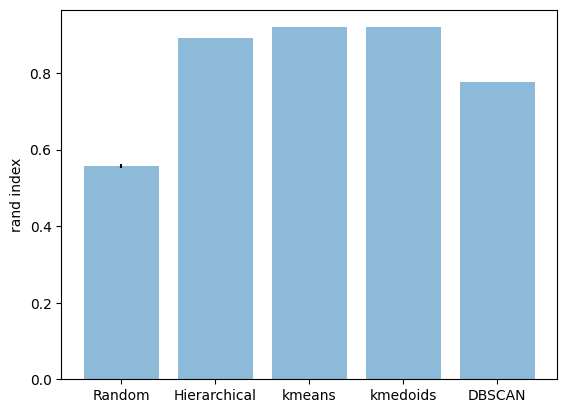

In [ ]:
ri = performance_analysis(100, vals, labels, 3, 'average', best_eps)